In [8]:
!pip install seaborn

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, roc_auc_score
)
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [35]:
# Step 2: Load Dataset
df = pd.read_csv("C:/Users/Asus/ML_Programs/Datasets/Fraud Detection Dataset (1).csv")
print("Shape:", df.shape)
print(df.head())


Shape: (51000, 12)
  Transaction_ID  User_ID  Transaction_Amount Transaction_Type  \
0             T1     4174             1292.76   ATM Withdrawal   
1             T2     4507             1554.58   ATM Withdrawal   
2             T3     1860             2395.02   ATM Withdrawal   
3             T4     2294              100.10     Bill Payment   
4             T5     2130             1490.50      POS Payment   

   Time_of_Transaction Device_Used       Location  \
0                 16.0      Tablet  San Francisco   
1                 13.0      Mobile       New York   
2                  NaN      Mobile            NaN   
3                 15.0     Desktop        Chicago   
4                 19.0      Mobile  San Francisco   

   Previous_Fraudulent_Transactions  Account_Age  \
0                                 0          119   
1                                 4           79   
2                                 3          115   
3                                 4            3   
4    

In [37]:
# See column names
print("\nColumns:", df.columns.tolist())
# Check dataset info
print("\nDataset Info:")
print(df.info())




Columns: ['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type', 'Time_of_Transaction', 'Device_Used', 'Location', 'Previous_Fraudulent_Transactions', 'Account_Age', 'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int6

In [38]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64


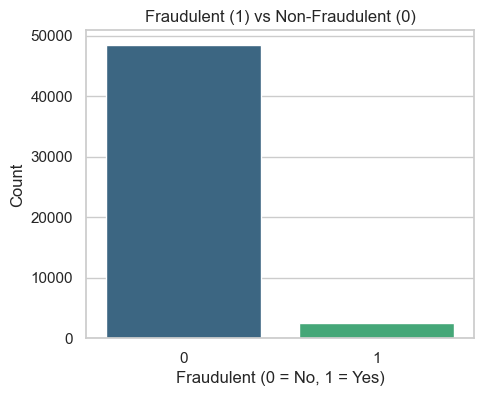

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x='Fraudulent', data=df, palette='viridis')
plt.title("Fraudulent (1) vs Non-Fraudulent (0)")
plt.xlabel("Fraudulent (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

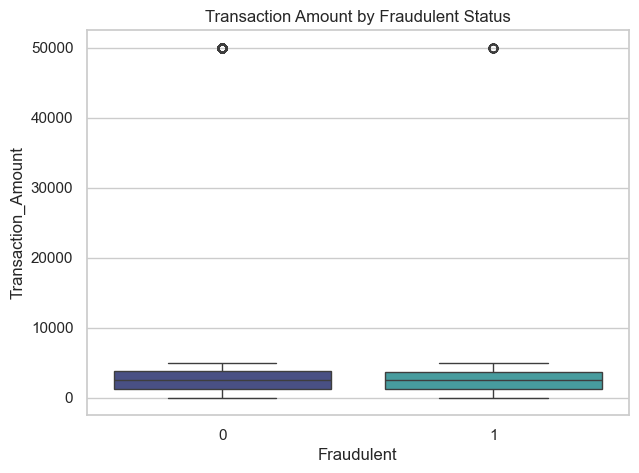

In [21]:

#Step 4: Visualize Transaction Amountplt.figure(figsize=(7,5))
plt.figure(figsize=(7,5))
sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=df, palette='mako')
plt.title("Transaction Amount by Fraudulent Status")
plt.show()

In [29]:
#Step 5: Encode Categorical Columns
cat_cols = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [30]:
#Step 6: Scale Numeric Columns
scaler = StandardScaler()
num_cols = ['Transaction_Amount', 'Previous_Fraudulent_Transactions', 
            'Account_Age', 'Number_of_Transactions_Last_24H']

df[num_cols] = scaler.fit_transform(df[num_cols])
#Step 7: Split Data for Training and Testing

X = df.drop(columns=['Fraudulent', 'Transaction_ID', 'User_ID'])
y = df['Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      9688
           1       1.00      0.05      0.09       512

    accuracy                           0.95     10200
   macro avg       0.98      0.52      0.53     10200
weighted avg       0.95      0.95      0.93     10200


Confusion Matrix:
 [[9688    0]
 [ 488   24]]


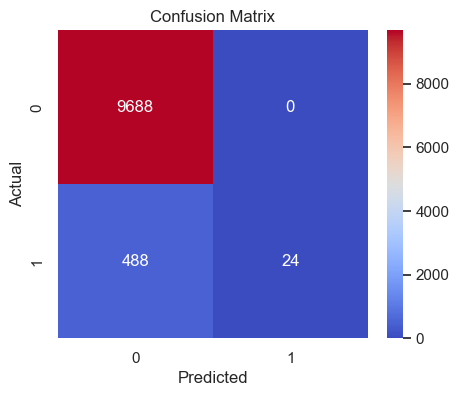

In [33]:
#Step 8: Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#Step 9: Evaluate Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


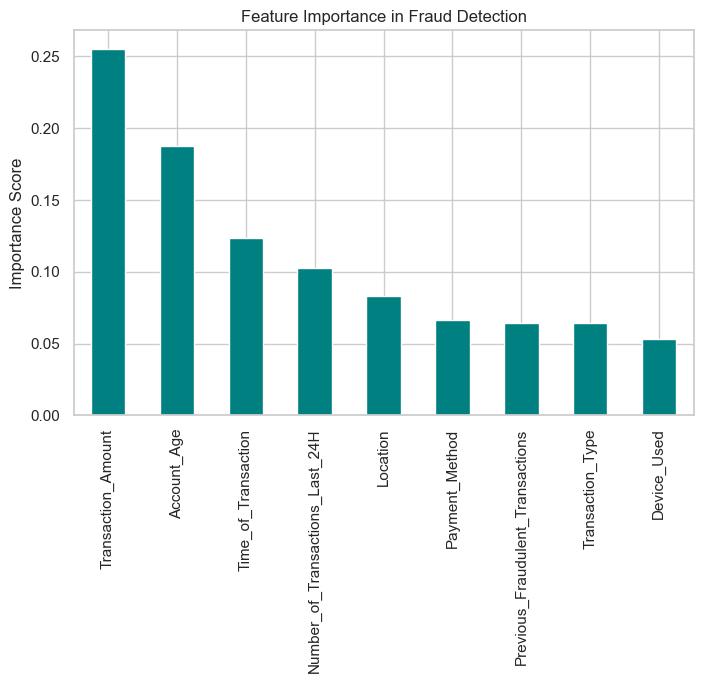

In [34]:
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance in Fraud Detection")
plt.ylabel("Importance Score")
plt.show()


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("C:/Users/Asus/ML_Programs/Datasets/PS_20174392719_1491204439457_log (1).csv")
print("Shape:", df.shape)
print(df.head())


Shape: (6362620, 11)
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
# See column names
print("\nColumns:", df.columns.tolist())
# Check dataset info
print("\nDataset Info:")
print(df.info())




Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [4]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [10]:
df = pd.read_csv("C:/Users/Asus/ML_Programs/Datasets/PS_20174392719_1491204439457_log (1).csv")
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop("isFraud", axis=1)
y = df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Categorical columns: Index(['type', 'nameOrig', 'nameDest'], dtype='object')
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.78      0.43      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.89      0.71      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524

